In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/weight_height_class_18.csv'
df=pd.read_csv(url)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df2=df.copy()
df3=df.copy()
df4=df.copy()
df5=df.copy()

In [4]:
df.shape

(8555, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [7]:
df.Gender.value_counts()

Male      5000
Female    3555
Name: Gender, dtype: int64

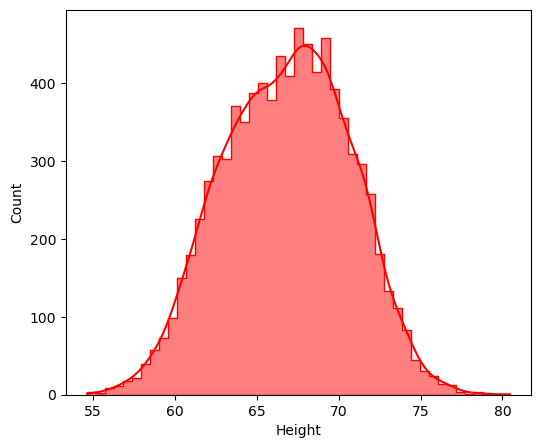

In [8]:
plt.figure(figsize=(6,5))
sns.histplot(df['Height'], kde=True,color="red",element="step", fill=True)
plt.show()

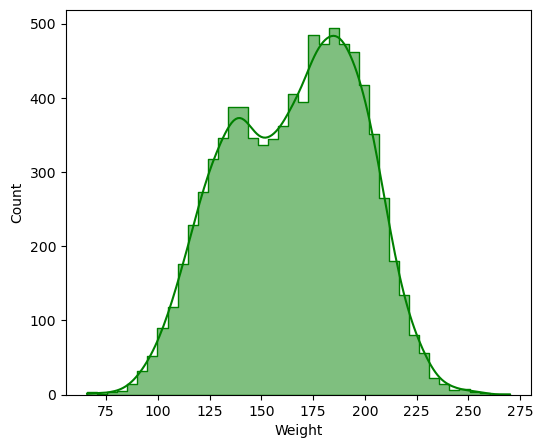

In [9]:
plt.figure(figsize=(6,5))
sns.histplot(df['Weight'], kde=True,color="green",element="step", fill=True)
plt.show()

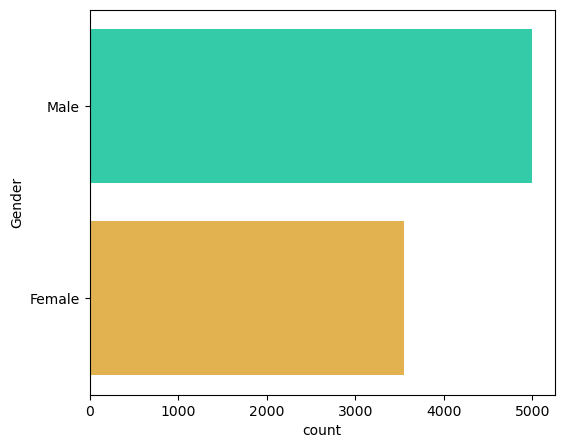

In [10]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,y="Gender",palette="turbo")
plt.show()

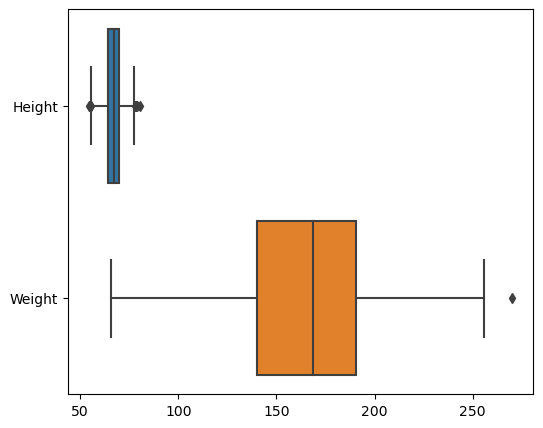

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df[["Height", "Weight"]], orient="h")
plt.show()

# Z Scores

In [12]:
h_mean=df["Height"].mean()
h_std=df["Height"].std()
df["Z_Score"]=(df["Height"]-h_mean)/h_std

In [13]:
df.head()

,Gender,Height,Weight,Z_Score
0,Male,73.847017,241.893563,1.827126
1,Male,68.781904,162.310473,0.512009
2,Male,74.110105,212.740856,1.895435
3,Male,71.730978,220.042470,1.277713
4,Male,69.881796,206.349801,0.797587


# StandardScaler

### **Z score==standardscaling**

In [14]:
scaler = StandardScaler()
df['Height_Scale'] = scaler.fit_transform(df[['Height']])
df.head()

,Gender,Height,Weight,Z_Score,Height_Scale
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634


In [15]:
print("Max Z score :",df.Z_Score.max())
print("========================================")
print("Min Z score :",df.Z_Score.min())
print("========================================")
print("Std Z score :",df.Z_Score.std())
print("========================================")
print("Mean Z score :",df.Z_Score.mean())

Max Z score : 3.5415386870680443
Min Z score : -3.1658344959558646
Std Z score : 0.9999999999999999
Mean Z score : -7.973360915601358e-17


# Remove outlier

In [16]:
max_z = df.Z_Score.max()
min_z = df.Z_Score.min()
print("Max zscore :",max_z)
print("=====================================")
print("Min zscore :",min_z)

Max zscore : 3.5415386870680443
Min zscore : -3.1658344959558646


In [17]:
df[(df['Z_Score'] >3)]

,Gender,Height,Weight,Z_Score,Height_Scale
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746


In [18]:
df[(df['Z_Score'] <-3)]

,Gender,Height,Weight,Z_Score,Height_Scale
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


# Outliers

In [19]:
df[(df['Z_Score'] >3) | (df['Z_Score'] <-3)]


,Gender,Height,Weight,Z_Score,Height_Scale
1317,Male,78.462053,227.342565,3.025384,3.025561
2014,Male,78.998742,269.989698,3.164731,3.164916
3285,Male,78.528210,253.889004,3.042561,3.042739
3757,Male,78.621374,245.733783,3.066750,3.066930
6328,Female,80.450000,178.020675,3.541539,3.541746
6624,Female,54.616858,71.393749,-3.165834,-3.166020
7294,Female,54.873728,78.606670,-3.099140,-3.099321
7617,Female,55.148557,88.812412,-3.027783,-3.027960


# New DataFrame

In [20]:
no_outliers=df[(df['Z_Score'] <3) & (df['Z_Score']>-3)]
no_outliers

,Gender,Height,Weight,Z_Score,Height_Scale
0,Male,73.847017,241.893563,1.827126,1.827233
1,Male,68.781904,162.310473,0.512009,0.512039
2,Male,74.110105,212.740856,1.895435,1.895545
3,Male,71.730978,220.042470,1.277713,1.277788
4,Male,69.881796,206.349801,0.797587,0.797634
...,...,...,...,...,...
8550,Female,60.483946,110.565497,-1.642491,-1.642587
8551,Female,63.423372,129.921671,-0.879292,-0.879344
8552,Female,65.584057,155.942671,-0.318287,-0.318306
8553,Female,67.429971,151.678405,0.160990,0.161000


In [21]:
total_outliers=df.shape[0]-no_outliers.shape[0]
print("Total Outliers :",total_outliers)

Total Outliers : 8


# No Outliers Found

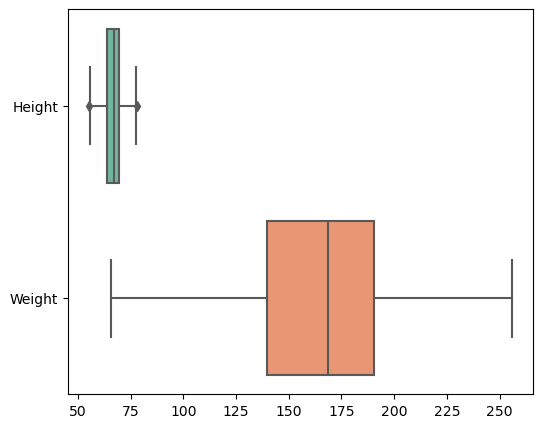

In [22]:
plt.figure(figsize=(6,5))
sns.boxplot(data=no_outliers[["Height", "Weight"]], orient="h",palette="Set2")
plt.show()

In [23]:
no_outliers.isnull().sum()

Gender          0
Height          0
Weight          0
Z_Score         0
Height_Scale    0
dtype: int64

# Standard Deviation

In [24]:
df2.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


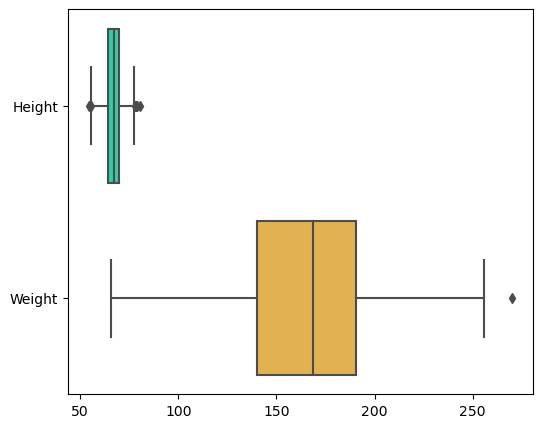

In [25]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df2[["Height", "Weight"]], orient="h",palette="turbo")
plt.show()

In [26]:
df2.Weight.mean()

165.6327353266768

In [27]:
df2.Weight.std()

32.04392221721551

In [28]:
upper_limit = df2.Weight.mean() + 3*df2.Weight.std()
upper_limit

261.7645019783233

In [29]:
lower_limit = df2.Weight.mean() -3*df2.Weight.std()
lower_limit

69.50096867503026

# Outliers

In [30]:
df2[(df2.Weight>upper_limit) | (df2.Weight<lower_limit)]

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
2014,Male,78.998742,269.989698
5360,Female,55.668202,68.982530


In [31]:
new_data=df2[(df2.Weight<upper_limit) & (df2.Weight>lower_limit)]
new_data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [32]:
print("New Data Shape :",new_data.shape)
print("========================================")
print("Old Data Shape :",df2.shape)

New Data Shape : (8551, 3)
Old Data Shape : (8555, 3)


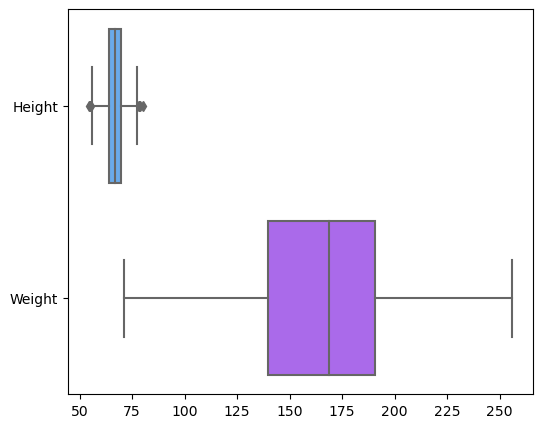

In [33]:
plt.figure(figsize=(6,5))
sns.boxplot(data=new_data[["Height", "Weight"]], orient="h",palette="cool")
plt.show()